In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
Y = cdc_diabetes_health_indicators.data.targets 
  


In [10]:
# Import
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn import svm 


In [20]:
# distribution of diabetes vs non diabetes
yes_diabetes = Y[Y["Diabetes_binary"] == 1]
no_diabetes = Y[Y["Diabetes_binary"] == 0]


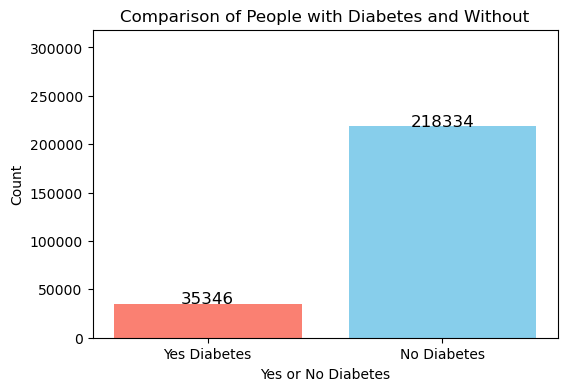

In [21]:
yes_count = len(yes_diabetes)
no_count = len(no_diabetes)

plt.figure(figsize=(6,4))
plt.bar(["Yes Diabetes", "No Diabetes"], [yes_count, no_count], color=["salmon", "skyblue"])

# Add labels and title
plt.xlabel("Yes or No Diabetes")
plt.ylabel("Count")
plt.title("Comparison of People with Diabetes and Without")
plt.ylim(0, max(yes_count, no_count) + 100000)  

for i, count in enumerate([yes_count, no_count]):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)


plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Ridge Regularization:
Intercept: [-7.73671708]
Coefficients:
HighBP: 0.7583456374025056
HighChol: 0.5787802910736838
CholCheck: 1.1898541136961
BMI: 0.06058443342747995
Smoker: -0.011880367408157677
Stroke: 0.1342893635679476
HeartDiseaseorAttack: 0.22183448829921126
PhysActivity: -0.05368862907346936
Fruits: -0.0505570239667756
Veggies: -0.034358853653676295
HvyAlcoholConsump: -0.7689000022969739
AnyHealthcare: 0.07052042933346289
NoDocbcCost: 0.015764298269221436
GenHlth: 0.5336475087283994
MentHlth: -0.003673044349217009
PhysHlth: -0.007339731294125127
DiffWalk: 0.12387166270485185
Sex: 0.2568054270781944
Age: 0.1229974002349704
Education: -0.03271271635302669
Income: -0.05154360309293411


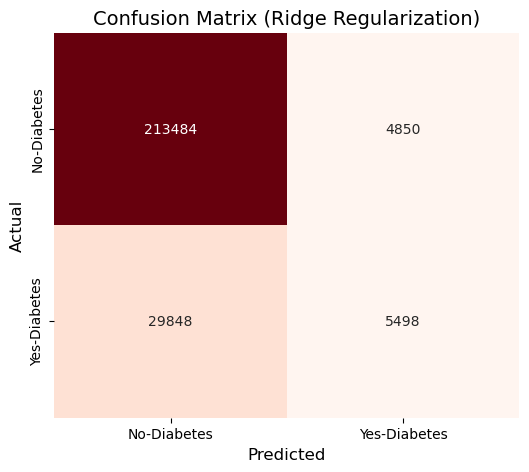

Accuracy (Ridge): 0.8632213812677388
Classification Report (Ridge):
              precision    recall  f1-score   support

           0       0.88      0.98      0.92    218334
           1       0.53      0.16      0.24     35346

    accuracy                           0.86    253680
   macro avg       0.70      0.57      0.58    253680
weighted avg       0.83      0.86      0.83    253680



In [22]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

# Logistic Regression with Ridge Regularization (L2)
logistic_regression_ridge = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Perform 5-fold cross-validation
y_pred_ridge = cross_val_predict(logistic_regression_ridge, X, Y, cv=5)

logistic_regression_ridge.fit(X, Y)

print("Ridge Regularization:")
print("Intercept:", logistic_regression_ridge.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, logistic_regression_ridge.coef_[0]):
    print(f"{feature}: {coef}")

conf_matrix_ridge = confusion_matrix(Y, y_pred_ridge)

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_ridge, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Ridge Regularization)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_ridge = accuracy_score(Y, y_pred_ridge)
print("Accuracy (Ridge):", accuracy_ridge)

print("Classification Report (Ridge):")
print(classification_report(Y, y_pred_ridge))


# Lasso 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Lasso Regularization:
Intercept: [-7.7176433]
Coefficients:
HighBP: 0.75814774009423
HighChol: 0.5783005399042518
CholCheck: 1.1706136858447556
BMI: 0.06054274668481782
Smoker: -0.011315765003049148
Stroke: 0.13377232399848496
HeartDiseaseorAttack: 0.2214614626707495
PhysActivity: -0.05312444310397076
Fruits: -0.05029500972844086
Veggies: -0.03378018195645066
HvyAlcoholConsump: -0.7684696714700608
AnyHealthcare: 0.0739231774034051
NoDocbcCost: 0.013701259685328943
GenHlth: 0.5335021995307884
MentHlth: -0.0036703596254507227
PhysHlth: -0.007330147217100174
DiffWalk: 0.12428597546661954
Sex: 0.2569347120433588
Age: 0.12287288783092634
Education: -0.03274020660593638
Income: -0.05172421724578397


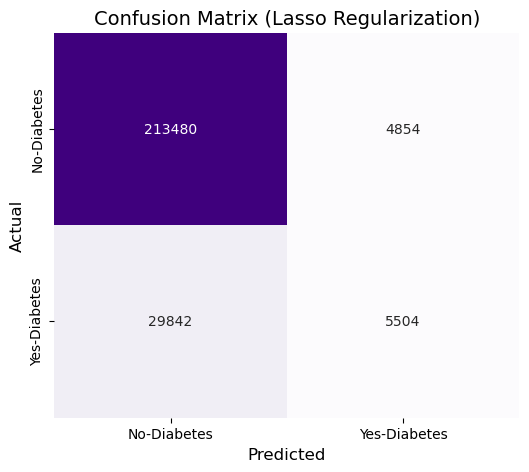

Accuracy (Lasso): 0.8632292652160202
Classification Report (Lasso):
              precision    recall  f1-score   support

           0       0.88      0.98      0.92    218334
           1       0.53      0.16      0.24     35346

    accuracy                           0.86    253680
   macro avg       0.70      0.57      0.58    253680
weighted avg       0.83      0.86      0.83    253680



In [24]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

# Logistic Regression with Ridge Regularization (L1)
logistic_regression_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Perform 5-fold cross-validation
y_pred_lasso = cross_val_predict(logistic_regression_lasso, X, Y, cv=5)

logistic_regression_lasso.fit(X, Y)

print("Lasso Regularization:")
print("Intercept:", logistic_regression_lasso.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, logistic_regression_lasso.coef_[0]):
    print(f"{feature}: {coef}")

conf_matrix_ridge = confusion_matrix(Y, y_pred_lasso)

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_ridge, annot=True, fmt='d', cmap='Purples', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Lasso Regularization)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_lasso = accuracy_score(Y, y_pred_lasso)
print("Accuracy (Lasso):", accuracy_lasso)

print("Classification Report (Lasso):")
print(classification_report(Y, y_pred_lasso))


# SVM

In [25]:
svm_linear = svm.SVC(kernel='linear', C = 1)

In [ ]:
# Fit the model
svm_linear.fit(X, Y)